In [27]:
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib as mol
mol.rcParams['axes.unicode_minus'] = False

## 실습예제1 - 아이리스 데이터 사용

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


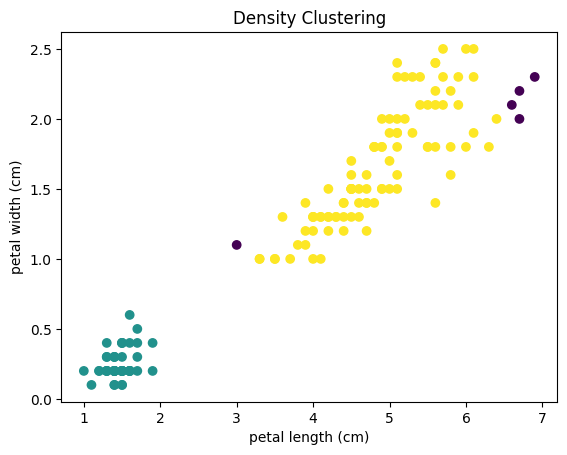

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10)   # eps:반경(epsilon) (default=0.5), min_samples:최소 데이터 개수 (default=5)
db.fit(iris_data_pd.iloc[:, 2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:, 2:4])

plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred)
plt.title("Density Clustering")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

In [3]:
db.labels_

# -1값이 이상치 => noise point

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

##### - min_smaples 변경 후 다시 분류

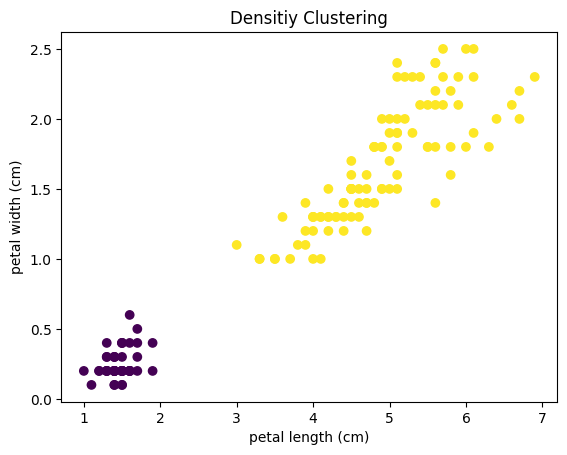

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [4]:
db.set_params(eps=0.5, min_samples=5)
y_pred = db.fit_predict(iris_data_pd.iloc[:, 2:4])

plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred)
plt.title("Densitiy Clustering")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()
print(db.labels_)

---

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=12, n_features=2, random_state=0)
X

array([[ 3.54934659,  0.6925054 ],
       [ 1.9263585 ,  4.15243012],
       [ 0.0058752 ,  4.38724103],
       [ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [-0.49772229,  1.55128226],
       [-1.4811455 ,  2.73069841],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [ 2.49913075,  1.23133799]])

--- 
#### - make_blobs(): n개의 무작위 데이터 클러스트를 생성한다.

- 인수:
    - <b style="background:yellow;">n_samples</b>: (default=100)
    - <b style="background:yellow;">n_features</b>: (default=2)
    - <b style="background:yellow;">enters</b>: (default=3)


- 반환값:
    - X: 독립변수, [n_samples, n_features] 크기의 배열
    - y: 종속변수, [n_samples] 크기의 배열
    
---    

In [6]:
y

array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1])

In [7]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("클러스터 레이블: \n{}".format(clusters))

클러스터 레이블: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


-- pip install mglearn


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


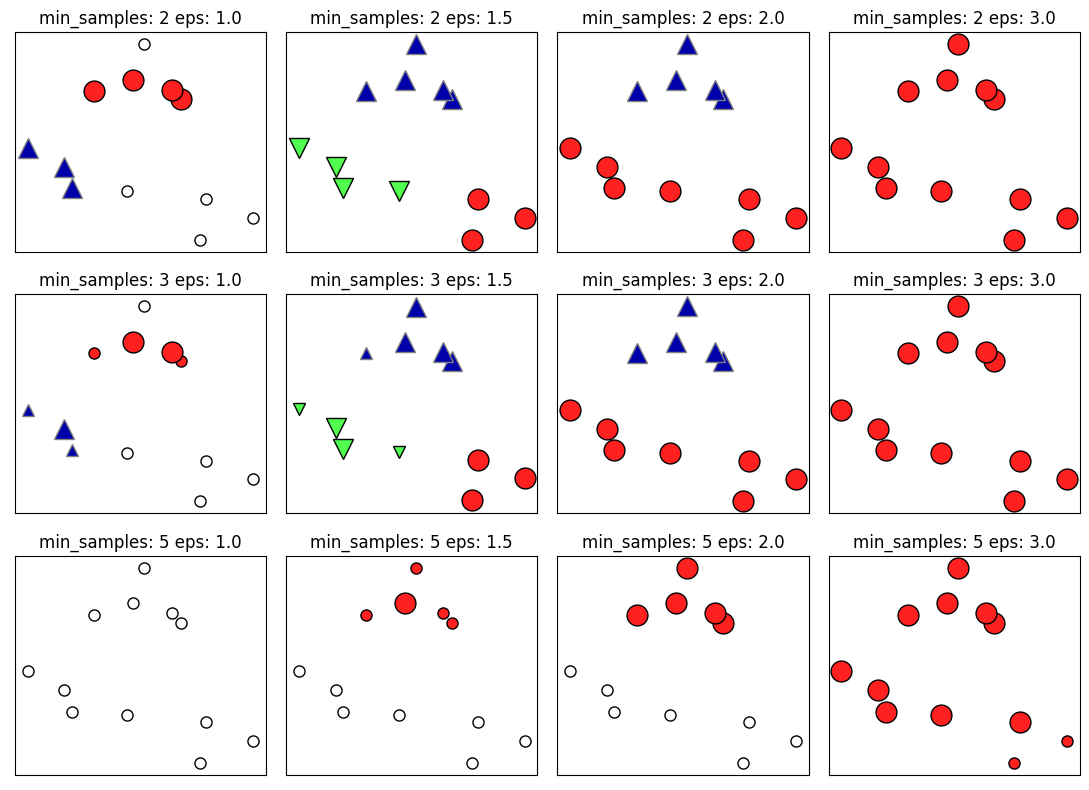

In [8]:
import mglearn

mglearn.plots.plot_dbscan()

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X)

print("클러스터 레이블: \n{}".format(clusters))

# -1이 많아 제대로 클러스터가 만들어졌다고 볼 수 없다.

클러스터 레이블: 
[-1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1]


In [10]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
clusters = dbscan.fit_predict(X)

print("클러스터 레이블: \n{}".format(clusters))

클러스터 레이블: 
[0 1 1 1 1 0 2 2 1 2 2 0]


### make_moons()
클러스트링용 데이터 생산 함수

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [12]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
x

# feature은 자동으로 2, 클러스터도 0, 1로 고정
# n_samples 개수만 정해주면 됨
# noise => 약간 흐트러진 모습

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385],
       [-0.36380036,  0.82790185],
       [ 0.24702417, -0.23856676],
       [ 1.81658658, -0.13088387],
       [ 1.2163905 , -0.40685761],
       [-0.8236696 ,  0.64235178],
       [ 0.98065583,  0.20850838],
       [ 0.54097175,  0.88616823],
       [ 0.348031  , -0.30101351],
       [ 0.35181497,  0.88827765],
       [-0.77708642,  0.82253872],
       [ 1.92590813,  0.01214146],
       [ 0.86096723, -0.47653216],
       [ 0.19990695,  0.99672359],
       [ 1.2895301 , -0.37071087],
       [-0.27847636,  1.02538452],
       [ 0.24187916, -0.07627812],
       [ 1.84988768, -0.09773674],
       [ 1.88406869,  0.0449402 ],
       [ 0.165822  ,

In [13]:
scaler_MMS = MinMaxScaler().fit(x)
x_scaled_MMS = scaler_MMS.transform(x)

In [14]:
dbscan = DBSCAN()
clusters_MMS = dbscan.fit_predict(x_scaled_MMS)
print("np.unique(clusters_MMS) 예측한 레이블: {}".format(np.unique(clusters_MMS)))

np.unique(clusters_MMS) 예측한 레이블: [0]


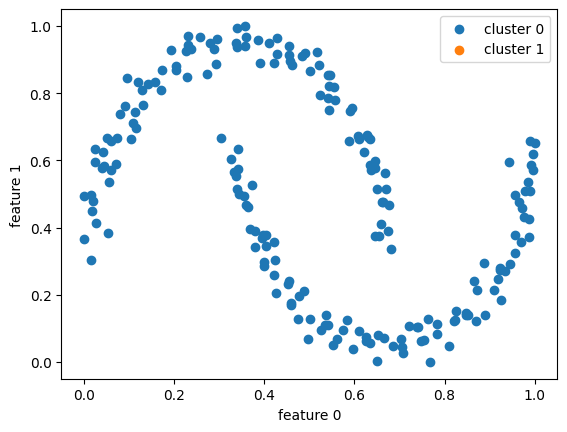

In [15]:
df = np.hstack([x_scaled_MMS, clusters_MMS.reshape(-1, 1)])
df_ft0 = df[df[:, 2] == 0, :]
df_ft1 = df[df[:, 2] == 1, :]

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label="cluster 0", cmap="Pairs")
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label="cluster 1", cmap="Pairs")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
plt.show()

##### - 전처리 처리를 StandardScaler사용

In [16]:
scaler_SS = StandardScaler().fit(x)
x_scaled_SS = scaler_SS.transform(x)

dbscan = DBSCAN()
clusters_SS = dbscan.fit_predict(x_scaled_SS)
print("np.unique(clusters_SS) 예측한 레이블: {}".format(np.unique(clusters_SS)))

np.unique(clusters_SS) 예측한 레이블: [0 1]


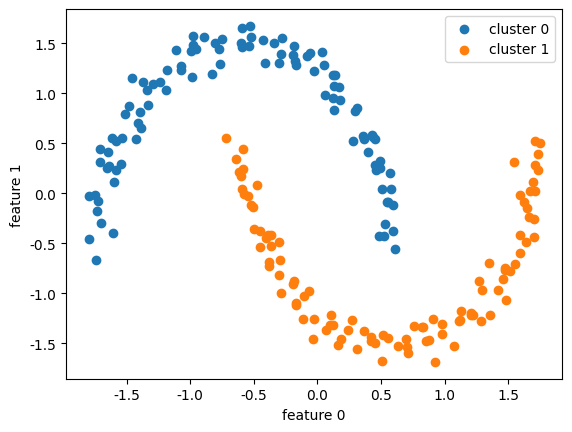

In [17]:
df = np.hstack([x_scaled_SS, clusters_SS.reshape(-1, 1)])
df_ft0 = df[df[:, 2] == 0, :]
df_ft1 = df[df[:, 2] == 1, :]

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label="cluster 0", cmap="Pairs")
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label="cluster 1", cmap="Pairs")
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
plt.show()

---

## 얼굴 데이터셋으로 군집 알고리즘 비교
### [DBSCAN 알고리즘]

In [28]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]   # True에 해당하는 데이터만 뽑아내겠다는 의미
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지 픽셀 값을 0~1 스케일로 조정 (MinMaxScaler적용과 비슷)
X_people = X_people / 255.

# 차원 축소 (데이터의 특성을 유지하면서 축소하는 기술)
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

# n_components=100 : 1차원 데이터의 5655컬럼을 100컬럼으로 축소시킴
# pca는 차수를 줄여 데이터 양을 줄임으로써 학습 시간을 축소시키기 위해 사용

---
##### => 데이터값 확인

In [29]:
people.keys() 

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [30]:
people.data.shape

(3023, 5655)

In [31]:
people.images.shape

(3023, 87, 65)

In [33]:
people.target

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [34]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [35]:
people.target_names.shape

# 62명, 한명당 20장이상의 사진

(62,)

In [37]:
print(people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [38]:
image_shape = people.images[0].shape
image_shape

# 컬러 이미지였다면, (87, 65, 3)으로 표시되었을 것이다.

(87, 65)

In [40]:
X, cnt = np.unique(people.target, return_counts=True)
print("X:\n", X)
print("cnt:\n", cnt)

X:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
cnt:
 [ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


In [41]:
mask = np.zeros(people.target.shape, dtype=np.bool)
print(mask.shape)
mask[:100]

(3023,)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [42]:
for target in np.unique(people.target):
    print(target)
    mask[np.where(people.target == target)[0][:50]] = 1   # 50개 사진만 뽑아오기위해 True값을 넣어줌
    print(np.where(people.target == target))
    
mask

0
(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998], dtype=int64),)
1
(array([   4,   17,   41,   87,  142,  216,  333,  413,  417,  508,  857,
        876,  940,  944,  949, 1165, 1307, 1505, 1529, 1539, 1729, 1807,
       1837, 1933, 2211, 2243, 2254, 2269, 2285, 2290, 2360, 2387, 2616,
       2636, 2926], dtype=int64),)
2
(array([  65,  188,  266,  509,  912, 1055, 1102, 1353, 1379, 1468, 1868,
       1924, 2073, 2115, 2180, 2272, 2344, 2412, 2444, 2492, 2531],
      dtype=int64),)
3
(array([  27,  237,  388,  449,  461,  612,  623,  676,  738,  770, 1106,
       1132, 1187, 1270, 1273, 1280, 1710, 1714, 1752, 1942, 2056, 2074,
       2160, 2176, 2206, 2216, 2255, 2527, 2601, 2608, 2675, 2738, 2742,
       2801, 2876, 3010], dtype=int64),)
4
(array([  43,   74,  133,  221, 

array([ True,  True,  True, ..., False, False, False])

In [43]:
X_people.shape

(2063, 5655)

In [44]:
y_people.shape

(2063,)

In [45]:
X_pca.shape

(2063, 100)

---

### 1. DBSCAN으로 얼굴 데이터셋 분석하기

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1]


#### min_samples=3 인 경우

In [20]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1]


#### min_samples=3, eps=15 인 경우

In [21]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1  0]


In [22]:
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))

# bincount(): 구간에 대한 카운트 수행 (cf. 음수는 카운트 불가)
# => 그래서 labels에 1을 더해 카운트

클러스터 별 포인트 수: [  31 2032]



eps=1, min_samples=3
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=1, min_samples=5
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=1, min_samples=7
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=1, min_samples=9
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=3, min_samples=3
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=3, min_samples=5
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=3, min_samples=7
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=3, min_samples=9
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=5, min_samples=3
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=5, min_samples=5
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=5, min_samples=7
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=5, min_samples=9
클러스터 값 [-1]
클러스터 수 1
클러스터 크기 [2063]

eps=7, min_samples=3
클러스터 값 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
클러스터 수 14
클러스터 크기 [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps=7, min_samples=5
클러스터 값 [-1  0  1]
클러스터 수 3
클러스터 크기 [2047   11    5]

eps=7, min_samples=7
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [2052   11]



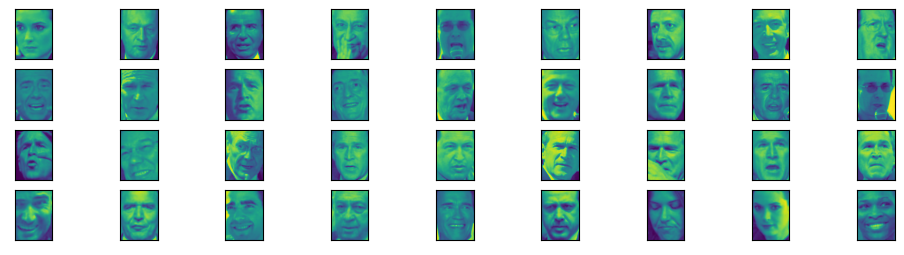

In [46]:
import matplotlib.pyplot as plt

noise = X_people[labels == -1]   # 잡음(noise) 이미지 추출
fig, axes = plt.subplots(4, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12,3))

for image, ax in zip(noise, axes.ravel()):   # 잡음(noise) 이미지 출력
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    
for eps in [1, 3, 5, 7, 9, 11, 13]:
    for min_samples in [3, 5, 7, 9]:
        print("\neps={}, min_samples={}".format(eps, min_samples))
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        
        print("클러스터 값 {}".format(np.unique(labels)))
        print("클러스터 수 {}".format(len(np.unique(labels))))        
        print("클러스터 크기 {}".format(np.bincount(labels + 1)))

=> 가장 많은 데이터가 나온 eps, min_samples

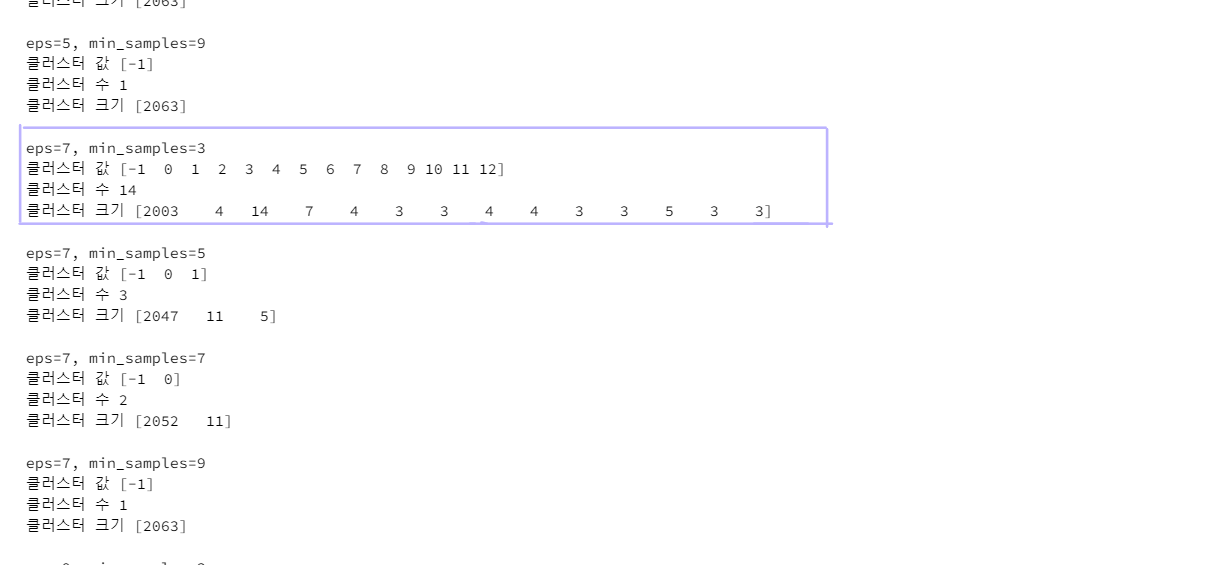

#### eps=7의 13개의 클러스터에 있는 모든 포인트를 시각화

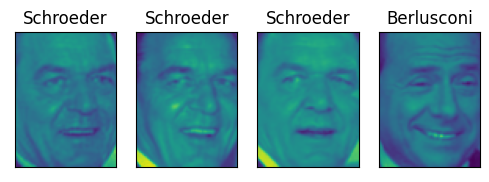

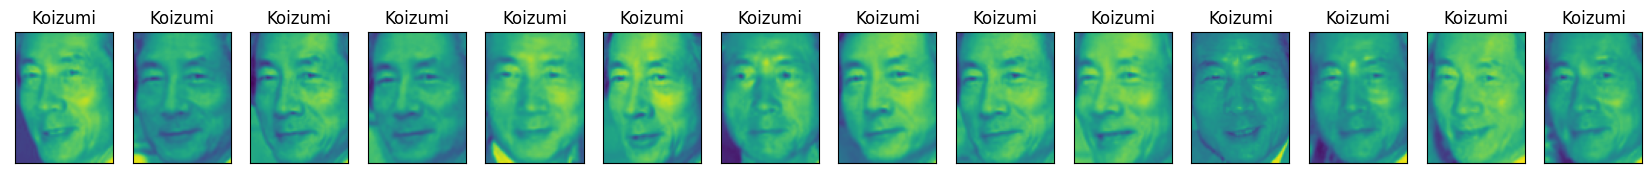

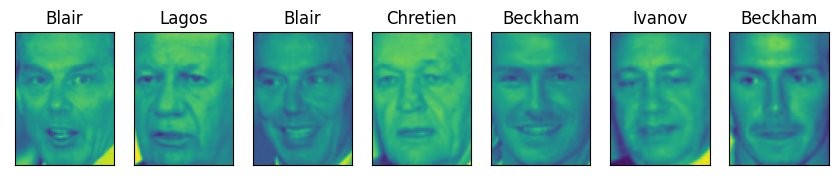

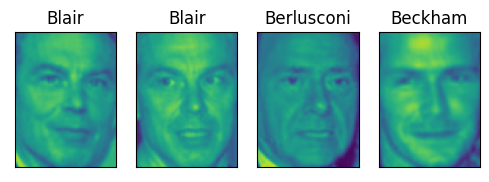

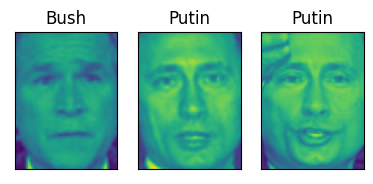

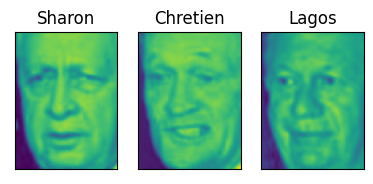

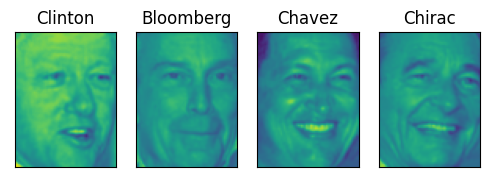

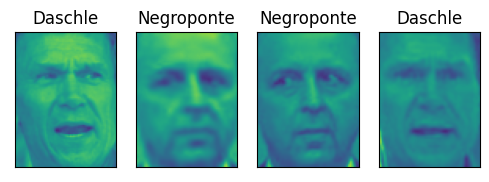

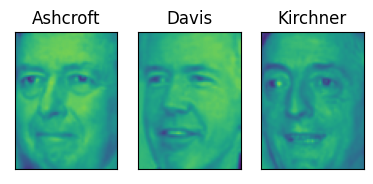

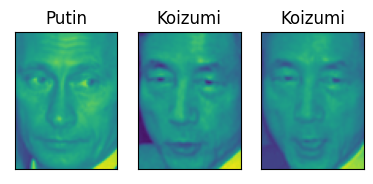

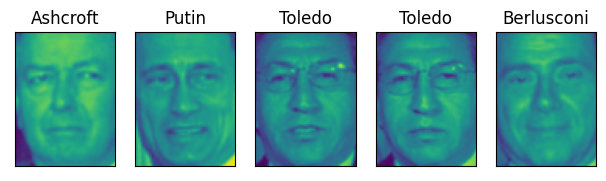

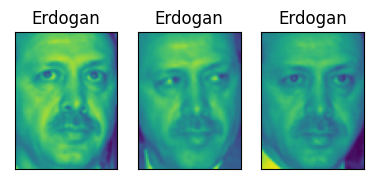

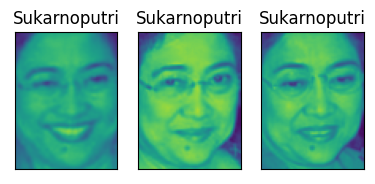

In [26]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):   # 잡음(noise) 이미지 출력
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])